# IODA exclusion-from-mzML notebook

**Purpose**: This notebook generates exclusion table formatted for XCalibur and MaxQuant.Live. It accepts as input one mzML file from one sample data. The ions detected will be added the exclusion list. If you already have an mzTab, we recommend using the dedicated [IODA exclusion-from-mzTab notebook](IODA_exclusion_from_mzTab.ipynb). 

If you want to customise feature detection with OpenMS, we recommend [using the OpenMS workflow locally](link_documentation) and upload the resulting mzTab to the [IODA exclusion-from-mzTab notebook](IODA_exclusion_from_mzTab.ipynb). 

**Documentation**: Please refer to the documentation page for more informations on the for IODA exclusion-from-mzML worklow. [See here](link).

**Instructions**: 
- Follow the instructions indicated below and run the cells accordingly
- Provide the mzTab for the sample data to be used. 
- Modify the variables below as needed.

===========================
### Step 1 - Provide the input mzML file

#### Method 1 
Upload your mzML with the Jupyter lab interface (left vertical panel: File / Upload icon on the top right). You can upload to the root of the binder server.

#### Method 2
We support downloading the mzTab file from the following cloud sharing services:
- **Google Drive** (recommended): obtain the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').
- **GoFile**: obtain the download sharing link from a file upload to [https://gofile.io/](https://gofile.io/) (make sure this is the actual downloading link).

**Specificy the mzML file name or sharing link in the *input_filename* variable in the cell below**. (The string must be between parenthesis). If the file is not in the root, indicate the proper path.

In [1]:
input_filename = "https://raw.githubusercontent.com/lfnothias/IODA_MS/test2/tests/Euphorbia/exclusion/toppas_input/Blank.mzML"

============================
### Step 2 - Run the OpenMS workflow

**Specify the variables of the OpenMS feature finding metabolomics (FFM) tool**

Note that the OpenMS workflow uses two parallel FFM tools. One FFM is optimised for the detection of narrow LC-MS features/peaks, while the other FFM is optimised for large LC-MS features/peaks. Note that we used the peak height for LC-MS peaks/features intensity estimation (instead of area under the curve). Parameters should be optimised depending on the sample complexity and acquisition parameters.

##### Mass accuracy for FFM
> *ppm_error*: the maximum mass error allowed for the feature detection. Used in both FFM tools. A value of 10 ppm is recommended for a resolution of 35K or less (must be an integer/float).

##### Noise level for FFM
> *narrow_feature_noise*: this is the MS1 noise level for the detection of narrow LC-MS features. The default value is 1E5 (must be an integer/float, can be in scientific format).

> *large_feature_noise*: this is the MS1 noise level for the detection of large LC-MS features. The default value is 5E5 (must be an integer/float, can be in scientific format).

TIPS: If your sample has a lot of features, increase the noise levels to limit the number of ions that are detected for subsequent exclusion.

In [2]:
from IODA_run_OpenMS_exclusion import *
from IODA_exclusion_workflow import *

In [3]:
#Debug variables
input_filename = "https://raw.githubusercontent.com/lfnothias/IODA_MS/test2/tests/Euphorbia/exclusion/toppas_input/Blank.mzML"
ppm_error = 10
narrow_feature_noise = 1E5
large_feature_noise = 5E5

In [4]:
IODA_exclusion_workflow(input_filename,ppm_error,narrow_feature_noise,large_feature_noise)

[I 200712 04:26:12 IODA_run_OpenMS_exclusion:27] 2020-07-12 04:26:12.928001
[I 200712 04:26:12 IODA_run_OpenMS_exclusion:34] This is the input: https://raw.githubusercontent.com/lfnothias/IODA_MS/test2/tests/Euphorbia/exclusion/toppas_input/Blank.mzML
[I 200712 04:26:12 IODA_run_OpenMS_exclusion:45] This is the input file path: https://raw.githubusercontent.com/lfnothias/IODA_MS/test2/tests/Euphorbia/exclusion/toppas_input/Blank.mzML


Starting the IODA-Exclusion workflow from a mzML file
Getting the mzML, please wait ...


[I 200712 04:26:16 IODA_run_OpenMS_exclusion:65]    ppm error = 10
[I 200712 04:26:16 IODA_run_OpenMS_exclusion:66]    narrow peak/feature noise threshold = 100000.0
[I 200712 04:26:16 IODA_run_OpenMS_exclusion:67]    large peak/feature noise_threshold = 500000.0


Copying the mzML to the TOPPAS/OpenMS input folder
Changing variables of the TOPPAS/OpenMS workflow
Initializing the TOPPAS/OpenMS workflow
Running the TOPPAS/OpenMS workflow, this could take several minutes, please wait ...
Completed the TOPPAS/OpenMS workflow
Zipping up the TOPPAS/OpenMS workflow files
All files zipped successfully!
Completed zipping up the TOPPAS/OpenMS workflow output files
You can continue the rest of the IODA workflow


============================
### Step 3 - Download the results of the OpenMS workflow
- Download the result files from
[download_results/IODA_exclusion_list_from_OpenMS.zip](download_results/IODA_exclusion_list_from_OpenMS.zip)
- You can examine the performance of the FFM by visualizing the featureXML with TOPPView. [See documentation here](documentation).

============================
### Step 4 - Set the parameters for building the exclusion list

The parameters below are used to the define the ions to be excluded.

*min_intensity*: the minimum intensity for the ion/feature to be retained in the exclusion list (absolute count of the peak height).

*rt_exclusion_margin*: define the side margin for the retention time range exclusion. Note that this value is added to each side of the actual feature/ion retention time range (in seconds).

**Specify the variables for exclusion list in the cell below**


In [5]:
min_intensity = 100
rt_exclusion_margin = 5

============================
### Step 5 - Run the cell below

Beside running the cell below, no action is needed.

[I 200712 04:27:03 IODA_exclusion_workflow:163] 2020-07-12 04:27:03.350546
[I 200712 04:27:03 IODA_exclusion_workflow:173] This is the input: TOPPAS_Workflow/toppas_output//TOPPAS_out/mzTab_Narrow/Blank.mzTab
[I 200712 04:27:03 IODA_exclusion_workflow:174] This is the input: TOPPAS_Workflow/toppas_output//TOPPAS_out/mzTab_Large/Blank.mzTab
[I 200712 04:27:03 IODA_exclusion_workflow:41] Filename(s) in the mzTab['Blank']
[I 200712 04:27:03 IODA_exclusion_workflow:41] Filename(s) in the mzTab['Blank']
[I 200712 04:27:03 IODA_exclusion_workflow:188] Assumed blank sample name: Blank
[I 200712 04:27:03 IODA_exclusion_workflow:191] User-defined parameters
[I 200712 04:27:03 IODA_exclusion_workflow:192] Minimum ion intensity treshold (count) = 100
[I 200712 04:27:03 IODA_exclusion_workflow:193] Additional margin for retention time range exclusion (seconds) = 5
[I 200712 04:27:03 IODA_exclusion_workflow:90] Initial number of ions = 600
[I 200712 04:27:03 IODA_exclusion_workflow:92] Number of io

Starting the IODA-exclusion workflow
Converting mzTab to table format
For narrow features
For large features
Running the table processing
Preparing list of excluded ions in XCalibur format
Preparing list of excluded ions in MaxQuant.Live format
Preparing plotting of the ions excluded
Zipping workflow results files
All files zipped successfully!
End the IODA-exclusion workflow
Plotting the results
 


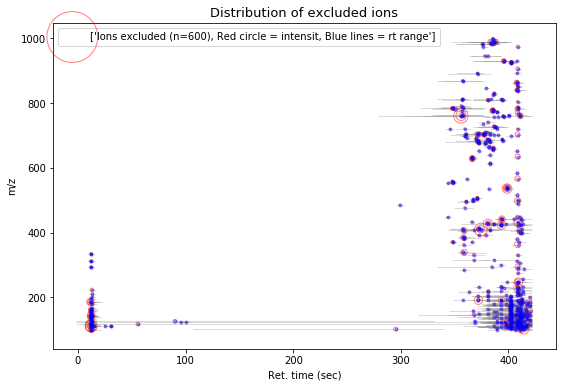

In [6]:
make_exclusion_from_mzTabs(min_intensity, rt_exclusion_margin)

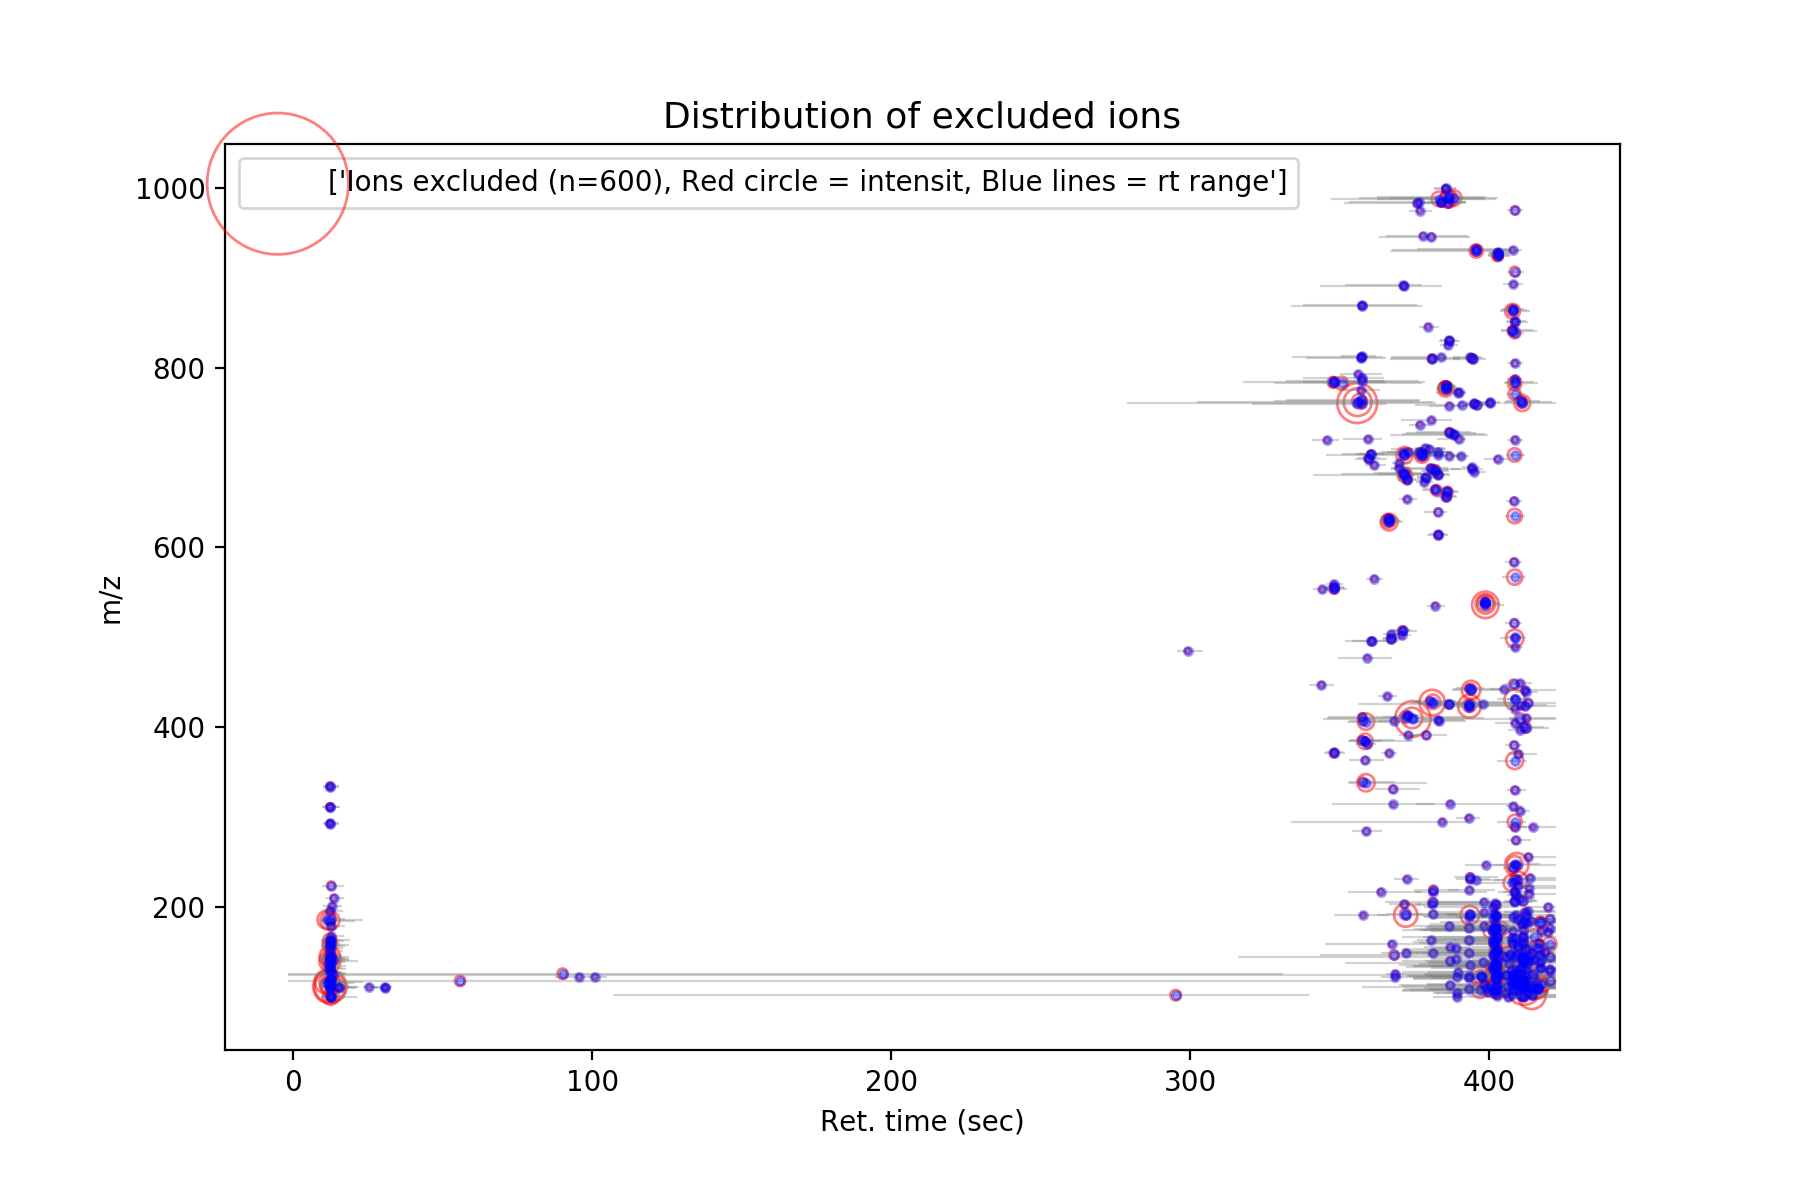

In [8]:
from IPython.display import Image
Image("results/plot_exclusion_RT_range_plot.png")

### Step 4 - Examine the results

- Examine the IODA-exclusion worflow log and the plots above in order to decide if the 'min_intensity' parameter is adapted to your data/mass spectrometer and sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should examinated during from the files generated by the OpenMS workflow.

![](results/plot_exclusion_scatter_RT.png)
![](results/plot_exclusion_scatter_MZ.png)

### Step 5 - Download the results

Download the result files from
[download_results/IODA_exclusion_results.zip](download_results/IODA_exclusion_results.zip?download=1)

### Step 6 - Prepare your acquisition method
For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).